In [1]:
import keras as ks

#Preprocessing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image

#modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report

#local file nav
import os

#plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import seaborn as sns

import pandas as pd
import numpy as np

#from sklearn.model_selection import train_test_split

from tqdm import tqdm

#import tensorflow as tf
import cv2
from cv2 import imread, imshow, IMREAD_GRAYSCALE


np.set_printoptions(threshold=60)

Using TensorFlow backend.


## Data Loading and Preprocessing

In [30]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
validate1 = pd.read_csv('validate1.csv')

In [31]:
validate1.shape

(1981, 4)

In [2]:
train_directory = '../text-recognition/train'
test_directory = '../text-recognition/test'
validate_directory = '../text-recognition/validate1'

In [34]:
class_labels = {'But': 0,
 'Sir': 1,
 'a': 2,
 'all': 3,
 'an': 4,
 'and': 5,
 'are': 6,
 'at': 7,
 'be': 8,
 'been': 9,
 'by': 10,
 'can': 11,
 'for': 12,
 'from': 13,
 'had': 14,
 'has': 15,
 'have': 16,
 'her': 17,
 'his': 18,
 'in': 19,
 'into': 20,
 'is': 21,
 'it': 22,
 'last': 23,
 'made': 24,
 'more': 25,
 'no': 26,
 'not': 27,
 'of': 28,
 'on': 29,
 'one': 30,
 'only': 31,
 'or': 32,
 'our': 33,
 'out': 34,
 'people': 35,
 'said': 36,
 'should': 37,
 'so': 38,
 'talks': 39,
 'than': 40,
 'that': 41,
 'the': 42,
 'their': 43,
 'them': 44,
 'there': 45,
 'this': 46,
 'to': 47,
 'was': 48,
 'were': 49,
 'when': 50,
 'which': 51,
 'who': 52,
 'will': 53,
 'with': 54,
 'would': 55}

In [3]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_directory,
        color_mode = 'grayscale',
        target_size=(64, 64),
        class_mode = 'categorical', 
        #classes = labels_list, 
        batch_size=11295)

Found 11295 images belonging to 56 classes.


- Get class labels from train_generator, and create new list with matching indices

In [4]:
class_dictionary = train_generator.class_indices

In [5]:
labels = {v: k for k, v in class_dictionary.items()}

In [9]:
labels_list = [words for words in labels.values()]
labels_list[43]

'their'

In [20]:
# validate_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
#         validate_directory,
#         color_mode = 'grayscale',
#         target_size=(64, 64),
#         class_mode = 'categorical', 
#         batch_size=1981)

Found 1981 images belonging to 56 classes.


In [39]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_directory,
        color_mode = 'grayscale',
        target_size= (64, 64),
        class_mode = 'categorical',
        classes = labels_list,
        batch_size= 1443)

Found 1443 images belonging to 56 classes.


In [40]:
train_data, train_labels = next(train_generator)
test_data, test_labels = next(test_generator)

In [41]:
print('training: {}'.format(train_data.shape))
#print('training:{}'.format(validate_data.shape))
print('testing: {}'.format(test_data.shape))

training: (11295, 64, 64, 1)
testing: (1443, 64, 64, 1)


In [202]:
print('training labels: {}'.format(train_labels.shape))
#print('validation:{}'.format(validate_data.shape))
print('testing labels: {}'.format(test_labels.shape))

training labels: (11295, 56)
testing labels: (1443, 56)


In [11]:
test_labels.shape

(1443, 56)

## Reshaping  (This is not actually used)

In [117]:
# # Reshape the train images 
# train_img_unrow = train_data.reshape(11295, -1).T

In [118]:
# # Reshape the test images
# test_img_unrow = test_data.reshape(1443, -1).T

In [15]:
# print(train_img_unrow.shape)
# print(test_img_unrow.shape)

(4096, 11295)
(4096, 1443)


In [147]:
train_img_unrow[3].shape

(11295,)

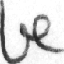

In [19]:
array_to_img(train_data[2])

In [203]:
train_labels[4]
#checking that images line up with classes. 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

In [145]:
train_generator.class_indices

{'But': 0,
 'Sir': 1,
 'a': 2,
 'all': 3,
 'an': 4,
 'and': 5,
 'are': 6,
 'at': 7,
 'be': 8,
 'been': 9,
 'by': 10,
 'can': 11,
 'for': 12,
 'from': 13,
 'had': 14,
 'has': 15,
 'have': 16,
 'her': 17,
 'his': 18,
 'in': 19,
 'into': 20,
 'is': 21,
 'it': 22,
 'last': 23,
 'made': 24,
 'more': 25,
 'no': 26,
 'not': 27,
 'of': 28,
 'on': 29,
 'one': 30,
 'only': 31,
 'or': 32,
 'our': 33,
 'out': 34,
 'people': 35,
 'said': 36,
 'should': 37,
 'so': 38,
 'talks': 39,
 'than': 40,
 'that': 41,
 'the': 42,
 'their': 43,
 'them': 44,
 'there': 45,
 'this': 46,
 'to': 47,
 'was': 48,
 'were': 49,
 'when': 50,
 'which': 51,
 'who': 52,
 'will': 53,
 'with': 54,
 'would': 55}

## Constructing Baseline ConvNet Model

In [ ]:
# # after the first layer, you don't need to specify
# # the size of the input anymore:
# model.add(Dense(32))

In [43]:
model = Sequential()
#The first convolution
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(64, 64, 1)))

model.add(MaxPooling2D(2, 2))

# The second convolution
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# The third convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#The fourth convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# # The fifth convolution
# model.add(Convolution2D(64, (3,3), activation='relu'))  < ---- adding fifth layer throws shaping error
# model.add(MaxPooling2D(2,2))

# # # Flatten the results to feed into a dense layer
model.add(Flatten())
          
# # 128 neuron in the fully-connected layer
model.add(Dense(128, activation='relu'))
          
# 56 output neurons for 56 classes with the softmax activation
model.add(Dense(56, activation='softmax'))


In [44]:
#Try with adam optimizer next

model.compile(loss='categorical_crossentropy',
              optimizer= 'RMSProp',
              metrics=['accuracy'])

In [45]:
train_data.shape

(11295, 64, 64, 1)

In [46]:
train_labels.shape

(11295, 56)

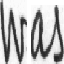

In [47]:
array_to_img(test_data[0])

In [48]:
x_val = train_data[:1000]
partial_x_train = train_data[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [49]:
x_val.shape

(1000, 64, 64, 1)

In [50]:
y_val.shape

(1000, 56)

In [51]:
11295 / 5

225.9

In [52]:
baseline_fit = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=225,
                    validation_data=(x_val, y_val))

Train on 10295 samples, validate on 1000 samples
Epoch 1/50
10295/10295 [==============================] - 25s 2ms/step - loss: 3.4693 - accuracy: 0.1582 - val_loss: 3.3767 - val_accuracy: 0.1580
Epoch 2/50
10295/10295 [==============================] - 25s 2ms/step - loss: 3.1443 - accuracy: 0.2533 - val_loss: 2.7856 - val_accuracy: 0.3530
Epoch 3/50
10295/10295 [==============================] - 25s 2ms/step - loss: 2.4739 - accuracy: 0.3889 - val_loss: 2.1779 - val_accuracy: 0.4340
Epoch 4/50
10295/10295 [==============================] - 26s 2ms/step - loss: 1.9672 - accuracy: 0.4860 - val_loss: 1.8753 - val_accuracy: 0.4990
Epoch 5/50
10295/10295 [==============================] - 25s 2ms/step - loss: 1.6783 - accuracy: 0.5433 - val_loss: 1.5486 - val_accuracy: 0.5860
Epoch 6/50
10295/10295 [==============================] - 25s 2ms/step - loss: 1.4312 - accuracy: 0.6017 - val_loss: 1.3474 - val_accuracy: 0.6350
Epoch 7/50
10295/10295 [==============================] - 25s 2ms/ste

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)         

In [57]:
score = model.evaluate(x_val, y_val)
print('model score: {}'.format(score))

1000/1000 [==============================] - 3s 3ms/step
model score: [1.02254683303833, 0.8309999704360962]


In [58]:
score

[1.02254683303833, 0.8309999704360962]

In [55]:
pred_test = model.predict(test_data)

In [56]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy: {}'.format(test_acc))

1443/1443 [==============================] - 5s 4ms/step
Test accuracy: 0.8225918412208557


In [ ]:
for items in pred_test:
    for i in items:
        print(items)
        

[3.53709390e-23 6.46294177e-01 2.94763904e-05 8.32812321e-27
 4.40296861e-11 4.56894628e-24 2.67295919e-20 1.04760445e-13
 1.05732141e-07 8.30979092e-17 2.77580902e-16 1.26536743e-16
 2.14833524e-02 2.28522183e-20 1.34908285e-19 8.64437306e-14
 5.07679756e-28 3.38991666e-13 7.36826290e-13 6.22626249e-06
 1.33538450e-22 2.15410545e-01 1.74767774e-05 2.99843098e-19
 1.40301448e-30 5.08642377e-31 5.98259913e-14 3.52319384e-17
 4.53149767e-20 8.55568683e-09 6.10739727e-32 1.09125752e-36
 2.13470235e-12 9.63239792e-24 5.47027487e-31 0.00000000e+00
 5.57546198e-32 0.00000000e+00 2.37014575e-11 0.00000000e+00
 1.53689962e-31 4.91190652e-25 3.33694615e-21 3.07830337e-22
 2.21085811e-30 9.67312609e-31 9.98686890e-27 1.16758704e-01
 4.94652832e-23 4.17758505e-30 1.26282833e-35 0.00000000e+00
 3.60878004e-25 2.68269006e-38 0.00000000e+00 0.00000000e+00]
[3.53709390e-23 6.46294177e-01 2.94763904e-05 8.32812321e-27
 4.40296861e-11 4.56894628e-24 2.67295919e-20 1.04760445e-13
 1.05732141e-07 8.30979

In [237]:
output

2

In [134]:
test_data[0]

array([[[0.90196085],
        [0.8862746 ],
        [0.8980393 ],
        ...,
        [0.6509804 ],
        [0.80392164],
        [0.86666673]],

       [[0.89019614],
        [0.8862746 ],
        [0.87843144],
        ...,
        [0.17254902],
        [0.23137257],
        [0.5529412 ]],

       [[0.9058824 ],
        [0.9058824 ],
        [0.87843144],
        ...,
        [0.14117648],
        [0.15686275],
        [0.30588236]],

       ...,

       [[0.9176471 ],
        [0.9215687 ],
        [0.90196085],
        ...,
        [0.909804  ],
        [0.9058824 ],
        [0.8980393 ]],

       [[0.909804  ],
        [0.9176471 ],
        [0.9058824 ],
        ...,
        [0.91372555],
        [0.90196085],
        [0.8980393 ]],

       [[0.92549026],
        [0.91372555],
        [0.8980393 ],
        ...,
        [0.89019614],
        [0.8862746 ],
        [0.909804  ]]], dtype=float32)

In [214]:
baseline_fit.history

{'val_loss': [2.90226261138916,
  1.9608309173583984,
  1.3700249576568604,
  1.1555408811569214,
  1.0293832182884217,
  0.9048099112510681,
  0.8821965837478638,
  0.8113105297088623,
  0.720560519695282,
  0.688314710855484,
  0.6813851189613342,
  0.66990966796875,
  0.6424260175228119,
  0.661257437467575,
  0.6428849577903748,
  0.6485456204414368,
  0.6459593617916107,
  0.707592203617096,
  0.7385055088996887,
  0.6822193336486816,
  0.7396063208580017,
  0.7373216426372529,
  0.8179294312000275,
  0.9063357889652253,
  0.7877838253974915,
  0.9345138037204742,
  0.8597035312652588,
  1.0746510803699494,
  0.8920238268375397,
  0.8856536549329758],
 'val_accuracy': [0.2930000126361847,
  0.4970000088214874,
  0.6269999742507935,
  0.6819999814033508,
  0.722000002861023,
  0.7409999966621399,
  0.7689999938011169,
  0.7720000147819519,
  0.7979999780654907,
  0.7990000247955322,
  0.8130000233650208,
  0.8140000104904175,
  0.8090000152587891,
  0.8309999704360962,
  0.82800000

In [1]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : RMSProp', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(baseline_fit.history['loss'], label='Training Loss')
plt.plot(baseline_fit.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(baseline_fit.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_fit.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

NameError: name 'plt' is not defined

In [133]:
#save baseline model before retraining for optimal params
model.save('BaslineCNN.h5')

In [109]:
from yellowbrick.classifier import ClassificationReport

#ERROR

#---> YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

# visualizer = ClassificationReport(baseline_fit, support = True)

# visualizer.fit(partial_x_train, partial_y_train)        # Fit the visualizer and the model
# visualizer.score(x_val, y_val)        # Evaluate the model on the test data
# visualizer.show()    

## View model predictions

In [ ]:
array_to_img(train_data[2])

In [61]:
def shape_new_img(image_path):
    
    """Input path to image file"""
    
    image_size = 64
    read_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(read_img, (image_size, image_size))
    finalarray = new_img_array.reshape(1, image_size, image_size, 1)
    
    return finalarray


         

In [62]:
shape_new_img('../text-recognition/out_of_data_samples/jpeg-test.JPG')

array([[[[122],
         [ 59],
         [ 83],
         ...,
         [ 78],
         [137],
         [126]],

        [[138],
         [161],
         [124],
         ...,
         [128],
         [130],
         [136]],

        [[131],
         [154],
         [ 81],
         ...,
         [116],
         [141],
         [152]],

        ...,

        [[ 48],
         [ 61],
         [ 66],
         ...,
         [133],
         [109],
         [ 91]],

        [[ 52],
         [ 66],
         [ 62],
         ...,
         [ 54],
         [ 83],
         [ 81]],

        [[ 56],
         [ 55],
         [ 71],
         ...,
         [103],
         [100],
         [ 94]]]], dtype=uint8)

In [226]:
prediction = model.predict([shape_new_img('../text-recognition/test/was/g01-000-00-08.png')])

In [231]:
prediction

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [228]:
#locate index of max value

np.argmax(prediction)

48

In [11]:
#check that word prediction is accurately mapped

labels_list[51]

'which'

In [63]:
their = model.predict([shape_new_img('../text-recognition/out_of_data_samples/01-their.png')])